In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_carox_tfidf.csv")

In [3]:
df_rf.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

Splitting dependent and independent variables

In [4]:
X = df_rf.drop(['index', 'X..CaryophylleneOxide'], axis = 1)
y = df_rf[['X..CaryophylleneOxide']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<Axes: ylabel='Count'>

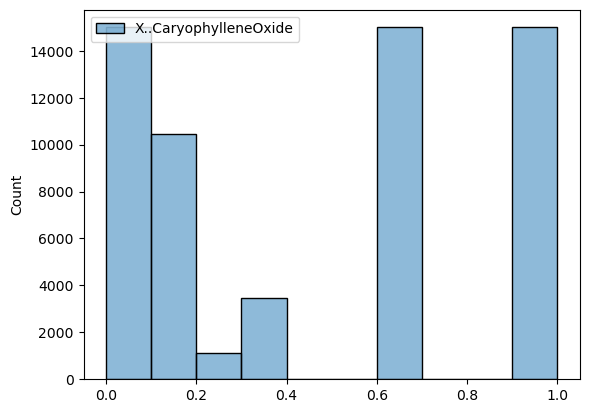

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_87940/350139188.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor()

In [10]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03102049385563143

In [12]:
mean_squared_error(y_val, y_pred_rfreg)

0.008715069975474924

In [13]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09335453912625204

In [14]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.982952809073444

In [15]:
#val
r2_score(y_val, y_pred_rfreg)

0.9428693070454603

Residual plots for each target variable

Feature Selection

In [16]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [17]:
df_feat

,features,score
0,tfidf_0,0.000829
1,tfidf_1,0.000378
2,tfidf_2,0.000405
3,tfidf_3,0.000562
4,tfidf_4,0.000636
...,...,...
464,tree,0.000131
465,tropical,0.000189
466,vanilla,0.003724
467,violet,0.000046


In [18]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [19]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
388,hybrid,2.284829e-01
253,tfidf_253,8.527333e-02
11,tfidf_11,2.990464e-02
329,tfidf_329,2.088079e-02
402,euphoric,1.869868e-02
285,tfidf_285,1.710012e-02
149,tfidf_149,1.575046e-02
168,tfidf_168,1.557637e-02
239,tfidf_239,1.033994e-02
121,tfidf_121,1.010408e-02


In [20]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [21]:
selector.estimator_.feature_importances_

array([9.39293473e-04, 3.69151127e-04, 5.33975066e-04, 5.78080878e-04,
       8.36210456e-04, 1.20890256e-03, 1.70236627e-03, 1.88237227e-03,
       3.55799658e-04, 1.46045663e-03, 4.87667990e-04, 3.01004807e-02,
       1.37206642e-03, 1.96982879e-03, 2.59231507e-04, 3.13062904e-04,
       7.07795467e-04, 8.26173655e-04, 1.72200681e-04, 9.06815959e-04,
       1.47382654e-03, 1.45017795e-03, 1.27569549e-03, 1.80290721e-04,
       1.26131391e-04, 1.43584804e-04, 5.63824268e-04, 3.32203309e-04,
       6.43737303e-04, 9.88852194e-05, 2.90270386e-03, 6.08612820e-04,
       9.82762726e-04, 2.92013252e-04, 1.85529414e-03, 4.21660167e-04,
       7.28584645e-05, 7.14865895e-03, 1.69569637e-04, 1.79208040e-03,
       3.68635483e-04, 1.24005522e-03, 3.71282539e-04, 2.17049954e-03,
       5.49000602e-04, 4.00781362e-04, 1.40252844e-03, 4.72571645e-04,
       1.52191409e-03, 1.41981909e-04, 9.28592471e-04, 4.97764647e-04,
       5.72370556e-04, 1.96802041e-04, 5.67815439e-04, 2.81812700e-04,
      

In [22]:
selector.threshold_

0.0021321961620469083

In [23]:
mask = selector.get_support()

In [24]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True, False,

In [25]:
selected_features = X.columns[mask]

In [26]:
selected_X = df_rf[selected_features]
selected_X

,tfidf_11,tfidf_30,tfidf_37,tfidf_43,tfidf_73,tfidf_81,tfidf_90,tfidf_93,tfidf_98,tfidf_104,...,citrus,diesel,earthy,grape,lemon,orange,pine,sweet,vanilla,woody
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
1,0.165804,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.165804,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.115840,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.106241,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,0.111610,0.0,0.098314,0.205162,0.0,0.142257,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59996,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59997,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59998,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Train test split (after Feature Selection)

In [27]:
import joblib

joblib.dump(selector, "selector_rf_tfidf_carox.pkl")
joblib.dump(selected_X, "selected_X_rf_tfidf_carox.pkl")

['selected_X_rf_tfidf_carox.pkl']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [29]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [30]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_87940/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [31]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03158390946547041

In [32]:
mean_squared_error(y_val, y_pred_rfreg)

0.009020796094059983

In [33]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09497787160207362

In [34]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9764238150185355

In [35]:
#val
r2_score(y_val, y_pred_rfreg)

0.9407808166600871

Hyperparameter Tuning

In [36]:
parameters = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [37]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [38]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [39]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100}

In [40]:
joblib.dump(rscv, "rscv_rf_tfidf_carox.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_tfidf_best_params_carox.pkl")

['rscv_rf_tfidf_best_params_carox.pkl']

RF (after Hyperparameter Tuning)

In [41]:
rfreg_ht = RandomForestRegressor(n_estimators = 500, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto', max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_87940/531738641.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [42]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03260179012638843

In [43]:
mean_squared_error(y_val, y_pred_rfreg)

0.00906344822525043

In [44]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.09520214401603795

In [45]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9759238184365141

In [46]:
#val
r2_score(y_val, y_pred_rfreg)

0.9405008164970783

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [47]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [48]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_tfidf_carox.pkl")
joblib.dump(y_test, "y_test_rfreg_tfidf_carox.pkl")

['y_test_rfreg_tfidf_carox.pkl']

In [49]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.03148137728474464

In [50]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.008304080933830902

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.09112673007318381

In [52]:
r2_score(y_test, y_pred_rfreg_test)

0.9458576410146688

Error analysis

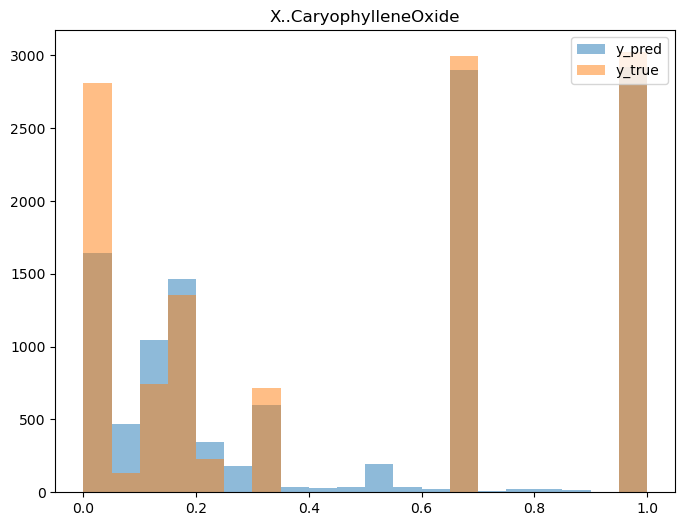

<Figure size 640x480 with 0 Axes>

In [53]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CaryophylleneOxide"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_carox.png')

Pearson R

In [54]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.974
P-value: 0.000


<Axes: >

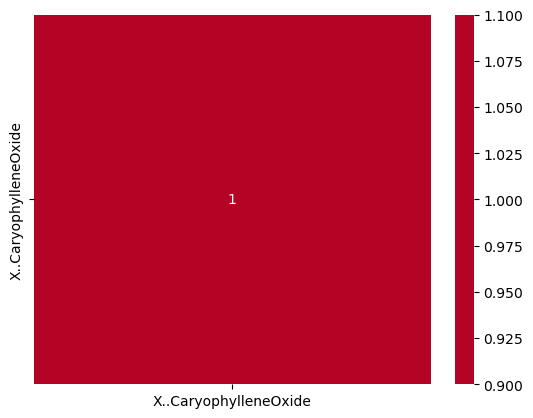

In [55]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)